Saving dolphins.gml to dolphins.gml
User uploaded file "dolphins.gml" with length 9518 bytes


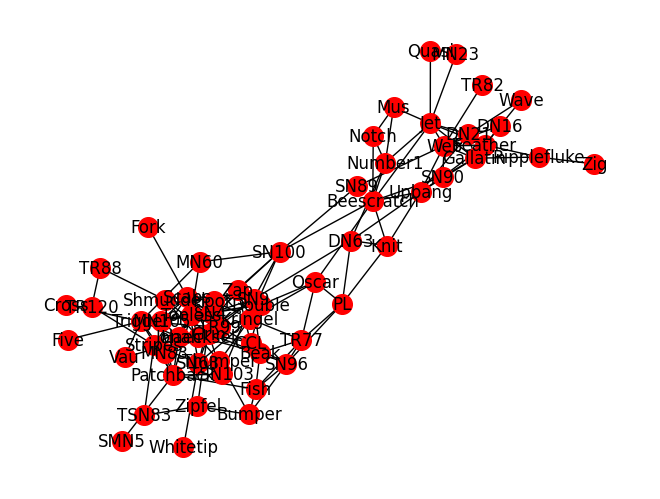

In [1]:
# リスト 2.1 ネットワークの読み込みと可視化
import networkx as nx
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  G = nx.readwrite.gml.read_gml(fn)
  nx.draw_spring(G, node_size=200, node_color='red', with_labels=True)

Saving dolphins.gml to dolphins (1).gml
User uploaded file "dolphins (1).gml" with length 9518 bytes


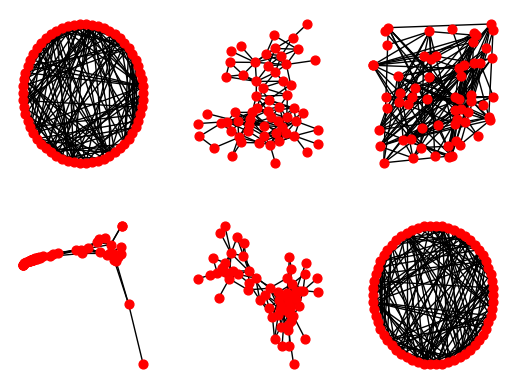

In [3]:
# リスト 2.2 ネットワークのさまざまな可視化
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  G = nx.readwrite.gml.read_gml(fn)

plt.subplot(231)
nx.draw_circular(G, node_size=40, node_color='red', with_labels=False)
plt.subplot(232)
nx.draw_kamada_kawai(G, node_size=40, node_color='red', with_labels=False)
plt.subplot(233)
nx.draw_random(G, node_size=40, node_color='red', with_labels=False)
plt.subplot(234)
nx.draw_spectral(G, node_size=40, node_color='red', with_labels=False)
plt.subplot(235)
nx.draw_spring(G, node_size=40, node_color='red', with_labels=False)
plt.subplot(236)
nx.draw_shell(G, node_size=40, node_color='red', with_labels=False)

Saving dolphins.gml to dolphins (2).gml
User uploaded file "dolphins (2).gml" with length 9518 bytes


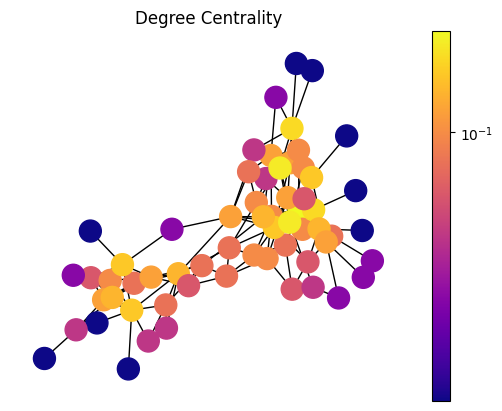

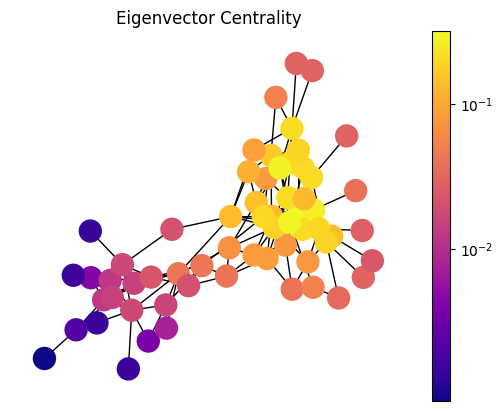

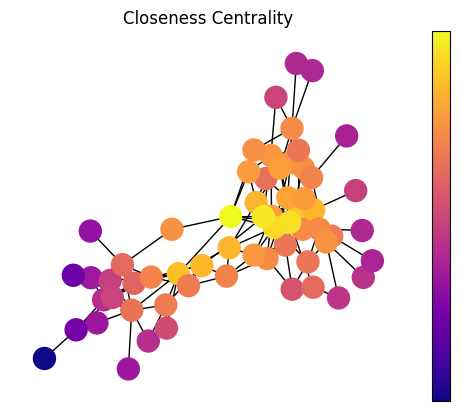

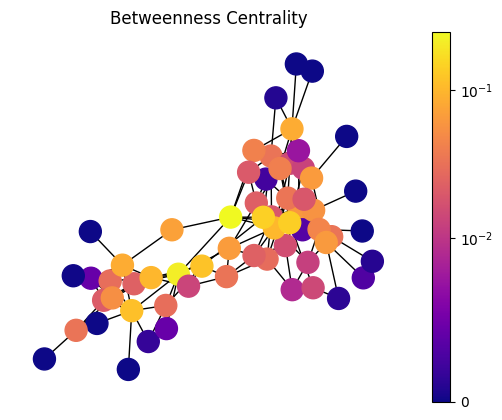

In [4]:
# リスト 2.3 4種類のネットワーク中心性
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def draw_h(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys()))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

import numpy as np
import numpy.linalg as LA
from pprint import pprint
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  G = nx.readwrite.gml.read_gml(fn)
pos = nx.spring_layout(G)
draw_h(G, pos, nx.degree_centrality(G), 'Degree Centrality')
draw_h(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')
draw_h(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')
draw_h(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')


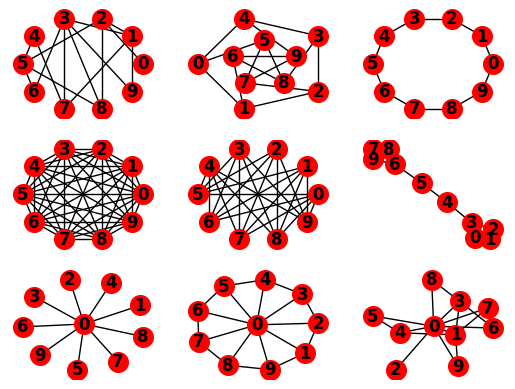

In [6]:
# リスト 2.4 さまざまな構造のネットワーク
import networkx as nx
import matplotlib.pyplot as plt
rnd = nx.gnp_random_graph(10,0.3)
plt.subplot(331)
nx.draw_circular(rnd, node_size=200, node_color='red', with_labels=True, font_weight='bold')

petersen = nx.petersen_graph()
plt.subplot(332)
nx.draw_shell(petersen, nlist=[range(5, 10), range(5)], node_size=200, node_color='red', with_labels=True, font_weight='bold')

cycle = nx.cycle_graph(10)
plt.subplot(333)
nx.draw_circular(cycle, node_size=200, node_color='red', with_labels=True, font_weight='bold')

K_10 = nx.complete_graph(10)
plt.subplot(334)
nx.draw_circular(K_10, node_size=200, node_color='red', with_labels=True, font_weight='bold')

K_5_5 = nx.complete_bipartite_graph(5, 5)
plt.subplot(335)
#nx.draw_circular(K_5_5, nlist=[range(5, 10), range(5)], node_size=200, node_color='red', with_labels=True, font_weight='bold')
nx.draw_circular(K_5_5, node_size=200, node_color='red', with_labels=True, font_weight='bold')

barbell = nx.barbell_graph(4, 2)
plt.subplot(336)
nx.draw_spring(barbell, node_size=200, node_color='red', with_labels=True, font_weight='bold')

star = nx.star_graph(9)
plt.subplot(337)
nx.draw(star, node_size=200, node_color='red', with_labels=True, font_weight='bold')

wheel = nx.wheel_graph(10)
plt.subplot(338)
nx.draw(wheel, node_size=200, node_color='red', with_labels=True, font_weight='bold')

ba = nx.barabasi_albert_graph(10, 2)
plt.subplot(339)
nx.draw_spring(ba, node_size=200, node_color='red', with_labels=True, font_weight='bold')

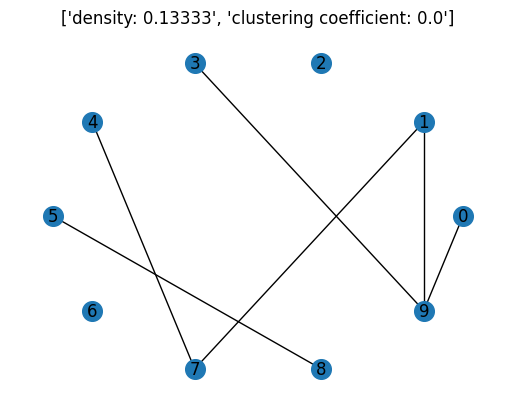

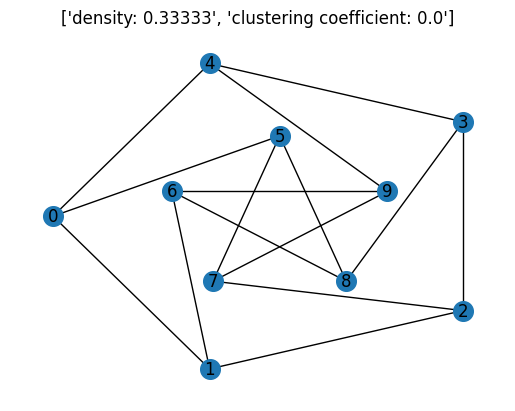

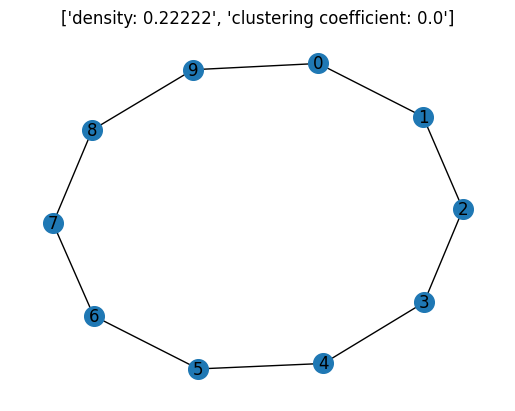

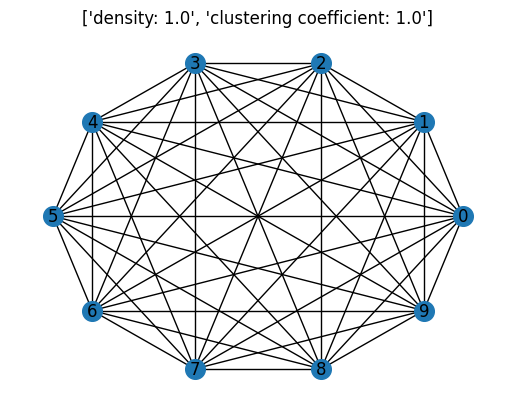

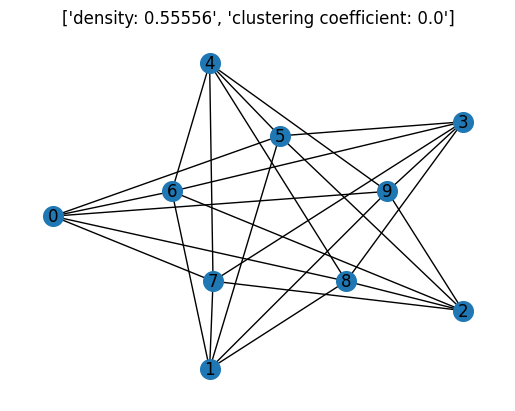

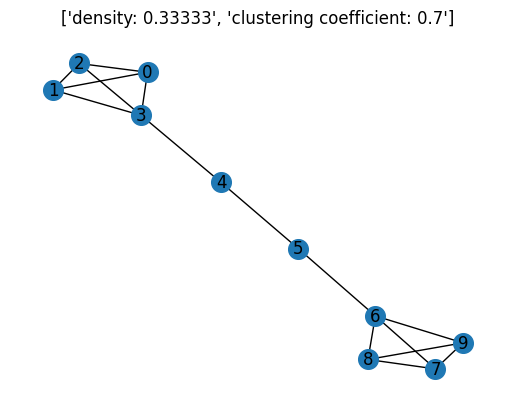

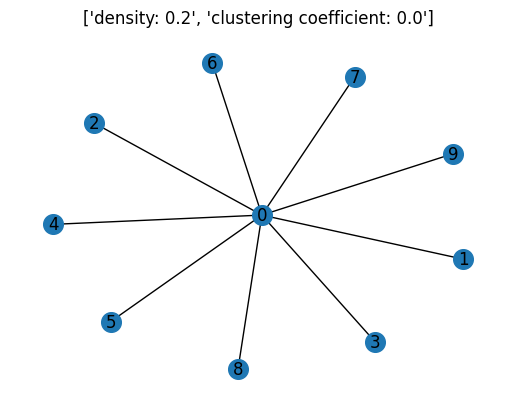

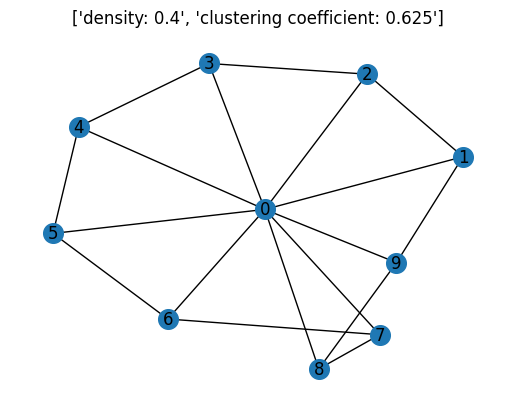

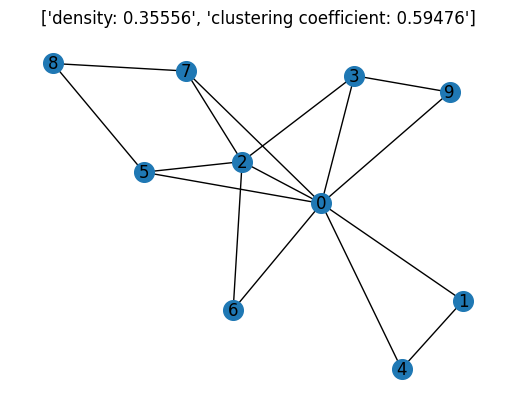

In [7]:
# リスト 2.5 ネットワークの密度とクラスタ係数
import networkx as nx
import matplotlib.pyplot as plt

def draw_m(G, pos):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=200)
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(['density: {:.5}'.format(nx.density(G)), 'clustering coefficient: {:.5}'.format(nx.average_clustering(G))])
    plt.axis('off')
    plt.show()

rnd = nx.gnp_random_graph(10,0.1)
pos = nx.circular_layout(rnd)
draw_m(rnd, pos)

petersen = nx.petersen_graph()
pos = nx.shell_layout(petersen, nlist=[range(5, 10), range(5)])
draw_m(petersen, pos)

cycle = nx.cycle_graph(10)
pos = nx.spring_layout(cycle)
draw_m(cycle, pos)

K_10 = nx.complete_graph(10)
pos = nx.circular_layout(K_10)
draw_m(K_10, pos)

K_5_5 = nx.complete_bipartite_graph(5, 5)
pos = nx.shell_layout(K_5_5, nlist=[range(5, 10), range(5)])
draw_m(K_5_5, pos)

barbell = nx.barbell_graph(4, 2)
pos = nx.spring_layout(barbell)
draw_m(barbell, pos)

star = nx.star_graph(9)
pos = nx.spring_layout(star)
draw_m(star, pos)

wheel = nx.wheel_graph(10)
pos = nx.spring_layout(wheel)
draw_m(wheel, pos)

ba = nx.barabasi_albert_graph(10, 2)
pos = nx.spring_layout(ba)
draw_m(ba, pos)

Saving dolphins.gml to dolphins (3).gml
User uploaded file "dolphins (3).gml" with length 9518 bytes


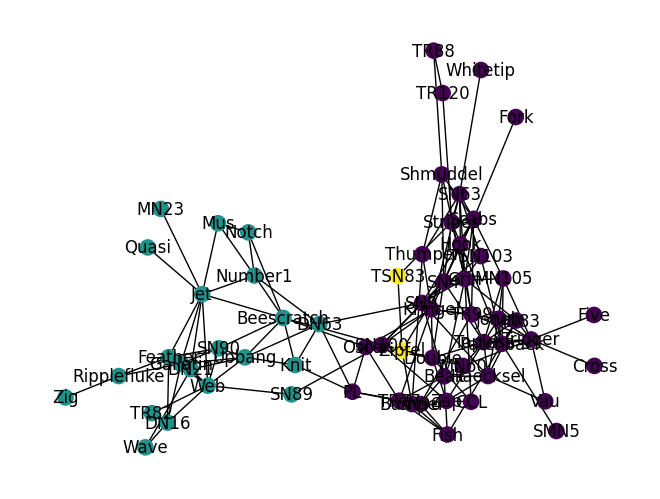

In [8]:
# リスト 2.6 コミュニティの抽出
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
from networkx.algorithms import community
import pandas as pd

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  G = nx.readwrite.gml.read_gml(fn)

carac = pd.DataFrame({ 'ID':G.nodes(), 'myvalue':[0]*len(G.nodes()) })

communities_generator = community.centrality.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
for m in range(len(next_level_communities)):
  for n in next_level_communities[m]:
    carac.loc[carac.ID == n, 'myvalue'] = m
nx.draw_spring(G, node_color = carac['myvalue'], node_size=120, with_labels=True)


Saving dolphins.gml to dolphins (4).gml
User uploaded file "dolphins (4).gml" with length 9518 bytes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

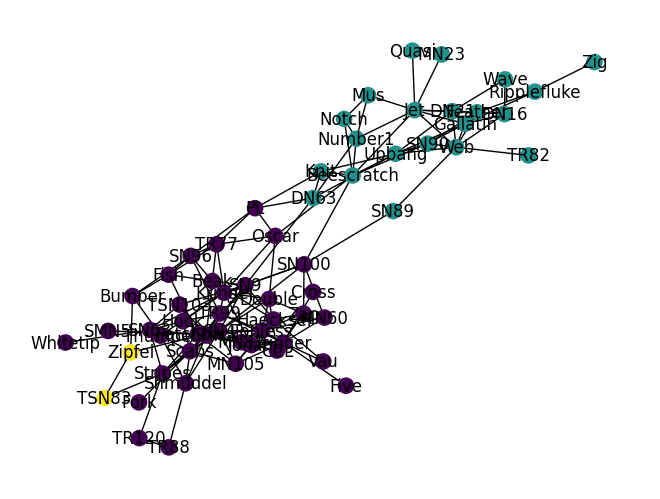

In [9]:
# リスト 2.7 ネットワーク可視化の画像の出力
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
from networkx.algorithms import community
import pandas as pd

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  G = nx.readwrite.gml.read_gml(fn)

carac = pd.DataFrame({ 'ID':G.nodes(), 'myvalue':[0]*len(G.nodes()) })

communities_generator = community.centrality.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
for m in range(len(next_level_communities)):
  for n in next_level_communities[m]:
    carac.loc[carac.ID == n, 'myvalue'] = m
nx.draw_spring(G, node_color = carac['myvalue'], node_size=120, with_labels=True)

savefn = fn.split('.')[0]+'.png'
plt.savefig(savefn)
files.download(savefn)
